## Exploratory Data Analysis

1. Data Overview

- **Goal**: Understand the structure of the dataset, including the number of rows, columns, and data types.

- **Key Steps:** Load the data and print a concise summary of the dataset using `.info()` and `.head()`.

In [1]:
#Import necessary libraries
import pandas as pd
import logging
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
# Import load_data module
from load_data import load_data

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import setup_logger
logger = setup_logger()

logger.info("Imported necessary libraries.")

2024-10-03 08:04:29,883 - INFO - Imported necessary libraries.


Load the dataset

In [2]:
logger.info("Data loading initiated.")
df = load_data('../data/data.csv')  # Assume load_data() is your function
logger.info("Data loaded successfully.")

2024-10-03 08:04:29,947 - INFO - Data loading initiated.
2024-10-03 08:04:33,559 - INFO - Data loaded successfully.


Data successfully loaded from ../data/data.csv
Dataset contains 95662 rows and 15 columns.



1. **Data overview**:

- Provide an overview of the dataset including shape, data types, missing values, and first few rows.

In [3]:
# Import the class CreditRiskEDA
from credit_risk_eda import CreditRiskEDA
# Initialize the class
cr_eda = CreditRiskEDA(df)
# Logging activity
logger.info("Data overview initiated.")

# Overview of the dataset
if not df.empty:
    cr_eda.data_overview()

logger.info("Data overview successfully completed.")


2024-10-03 08:06:15,651 - INFO - Data overview initiated.


Data Overview:
Number of rows: 95662
Number of columns: 15

Column Data Types:
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First Five Rows:


,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
TransactionId,,,,,,,,,,,,,,,
TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


2024-10-03 08:06:15,853 - INFO - Data overview successfully completed.



Missing Values Overview:
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


**Data Overview Summary**

- The dataset contains 95,662 rows and 15 columns, providing a substantial amount of data for analysis.

- The data types are generally correct, except for the `TransactionStartTime` column, which is currently stored as an object. This column should be converted to datetime format for accurate time-based analysis.

- No missing values were detected in any of the columns, ensuring the dataset is complete and ready for further analysis without the need for imputation.

**2. Summary Statistics**

- Understand the central tendency, dispersion, and shape of the dataset’s distribution.


In [4]:
# Log the start of the summary statistics process
logger.info("Generating summary statistics for numeric columns...")   

# Statistical summary
summary_stats = cr_eda.summary_statistics()
display(summary_stats.T)
# Log completion
logger.info("Summary statistics generation completed.")

2024-10-03 08:06:15,900 - INFO - Generating summary statistics for numeric columns...


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000
median,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
mode,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000


2024-10-03 08:06:16,354 - INFO - Summary statistics generation completed.


**Observations:**

- The `CountryCode` is constant at `256`, indicating no variability in this column.
- The `Amount` and `Value` features show a high degree of skewness (both over 51), indicating potential outliers or heavy-tailed distributions.

- `PricingStrategy` is fairly stable with most values centered around 2.

- `FraudResult` has a very low mean, indicating a low occurrence of fraudulent transactions, with a highly positive skewness suggesting a majority of zeros.

**Distribution of Numerical Features**

- Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.


2024-10-03 08:06:16,370 - INFO - Plot Numberical Distribution...


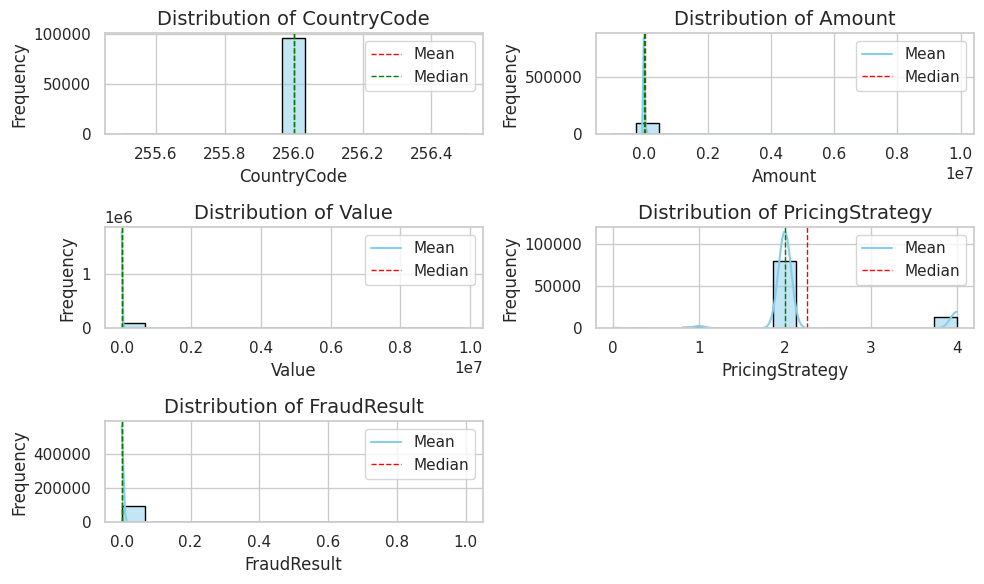

2024-10-03 08:06:24,299 - INFO - The distribution plot successfully completed.


In [5]:
# Logger activity
logger.info("Plot Numberical Distribution...")
# List of numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Plot distibution
cr_eda.plot_numerical_distribution(numeric_cols)
logger.info("The distribution plot successfully completed.")

**Key insights:**

- Most of the numerical features exhibit right-skewness, indicating that there are a few extreme values that pull the mean to the right.

- The distributions of CountryCode, Amount, and Value have clear peaks, suggesting common values or ranges.

- The distribution of PricingStrategy has a clear peak at 2, indicating a preferred pricing strategy.

- The distribution of FraudResult shows a majority of non-fraudulent transactions.


**Skewness:**

- Visualize the skewness of numerical features


2024-10-03 08:06:25,088 - INFO - Visualizing Skewness of numercial features...


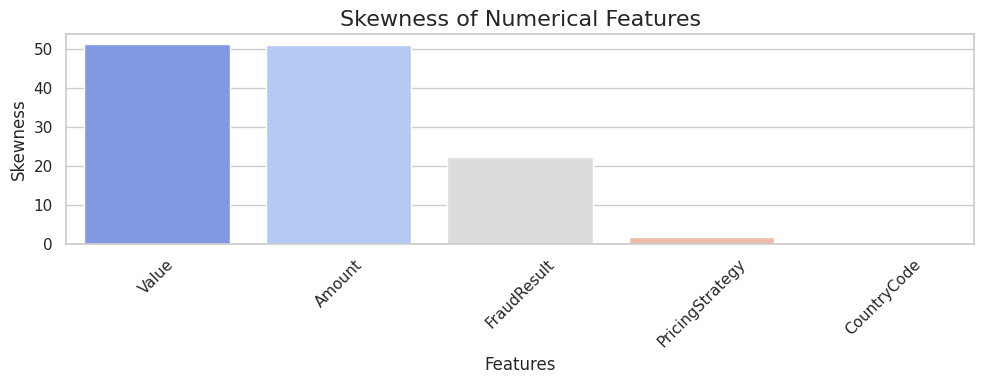

2024-10-03 08:06:25,634 - INFO - Visualization successfully completed.


In [6]:
# Logger activity
logger.info("Visualizing Skewness of numercial features...")
if not df.empty:
    cr_eda.plot_skewness()
logger.info("Visualization successfully completed.")


Key Insights:

- `CountryCode`: This feature remains constant (256) across all entries, indicating the data pertains to a single geographical region. Since there is no variability in this feature, it will not contribute to model performance and can be considered for removal in subsequent analysis.

- `Amount`: The distribution of the transaction amount is highly right-skewed with extreme outliers, as indicated by a skewness value of over 51. This suggests that a few transactions have significantly higher amounts than the rest. Such skewness can distort the model's learning process, so normalization or transformation (e.g., log transformation) may be necessary to handle these extreme values.

- `Value`: The absolute value of transactions shows a similar pattern to Amount, with a high degree of skewness. The presence of large outliers implies that these transactions have a disproportionate effect on the overall data. Addressing this skewness through appropriate scaling will help balance the data for better model performance.

- `PricingStrategy`: The data shows a preference for a specific pricing strategy (category 2), which dominates the distribution. This could indicate a business preference or customer inclination toward that pricing strategy. However, there is less skewness here, suggesting that the distribution is more balanced compared to other features.

- `FraudResult`: Fraudulent transactions are extremely rare, as evidenced by the mean close to zero and the right-skewness of over 22. This class imbalance may lead to model bias toward predicting non-fraudulent transactions. Addressing this imbalance through techniques like oversampling the fraud cases or employing specialized algorithms may be required to ensure the model effectively captures fraudulent behavior.

In [7]:
df.select_dtypes(include='number')

,CountryCode,Amount,Value,PricingStrategy,FraudResult
TransactionId,,,,,
TransactionId_76871,256,1000.0,1000,2,0
TransactionId_73770,256,-20.0,20,2,0
TransactionId_26203,256,500.0,500,2,0
TransactionId_380,256,20000.0,21800,2,0
TransactionId_28195,256,-644.0,644,2,0
...,...,...,...,...,...
TransactionId_89881,256,-1000.0,1000,2,0
TransactionId_91597,256,1000.0,1000,2,0
TransactionId_82501,256,-20.0,20,2,0


In [8]:
# Logging activity
logger.info("Data overview initiated.")

# Summary of  of the dataset
if not df.empty:
    cr_eda.summary_statistics()

logger.info("Data overview successfully completed.")


2024-10-03 08:06:25,760 - INFO - Data overview initiated.
2024-10-03 08:06:25,821 - INFO - Data overview successfully completed.
